In [142]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from tqdm import tqdm # loop vizualization

In [165]:
def plot_decision_boundary(model, x, y):

  # Задаем цвета для точек в зависимости от их класса
  colors = ["red" if y[i] == 0 else "blue" for i in range(4)]

    # Рисуем точки на графике
  plt.scatter(x[:, 0], x[:, 1], c=colors)

    # Задаем диапазон значений для осей x и y
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    # Создаем сетку из 100 точек по каждой оси
  xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))

    # Вычисляем выход модели для каждой точки сетки
  zz = model(torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)).reshape(100, 100)

    # Рисуем контурную карту выхода модели
  plt.contourf(xx.detach().numpy(), yy.detach().numpy(), zz.detach().numpy(), alpha=0.7, cmap=plt.cm.RdYlBu)

    # Показываем график
  plt.show()

In [144]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_or = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32) # OR
y_xor = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32) # XOR

In [145]:
class model_OR(nn.Module):
    def __init__(self):
        super(model_OR, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        return x

In [146]:
model_or = model_OR()
optimizer = Adam(params=model_or.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [147]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model_or(x)
    loss = loss_func(outputs, y_or)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 5000/5000 [00:01<00:00, 3032.61it/s]


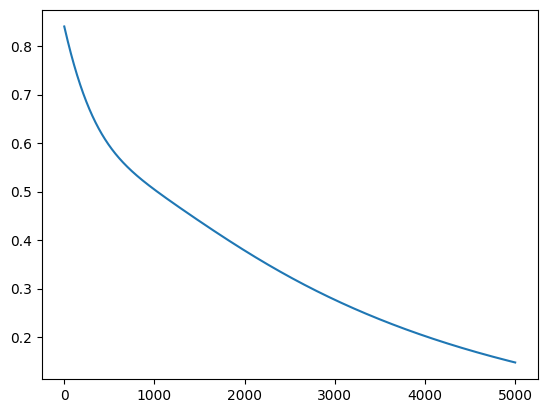

In [148]:
plt.plot(losses)

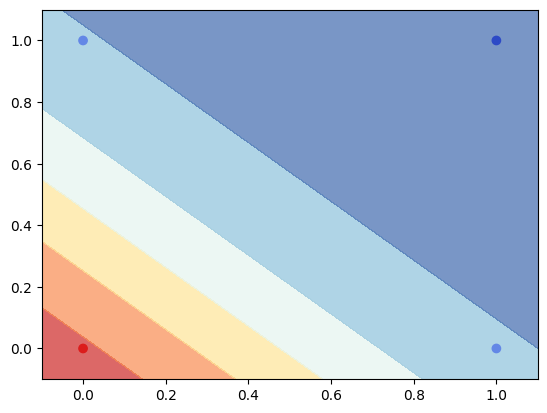

In [167]:
plot_decision_boundary(model_or, x, y_or)

In [150]:
print("OR")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_or[i].detach().numpy()}\t{round(model_or(x[i]).item())}")

OR
x	y	output
[0. 0.]	[0.]	0
[0. 1.]	[1.]	1
[1. 0.]	[1.]	1
[1. 1.]	[1.]	1


In [151]:
class model_XOR1(nn.Module):
    def __init__(self):
        super(model_XOR1, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        return x

In [152]:
model_xor1 = model_XOR1()
optimizer_xor1 = Adam(params=model_xor1.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [153]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model_xor1(x)
    loss = loss_func(outputs, y_xor)
    loss.backward()
    losses.append(loss.item())
    optimizer_xor1.step()
    optimizer_xor1.zero_grad()

100%|██████████| 5000/5000 [00:01<00:00, 3049.09it/s]


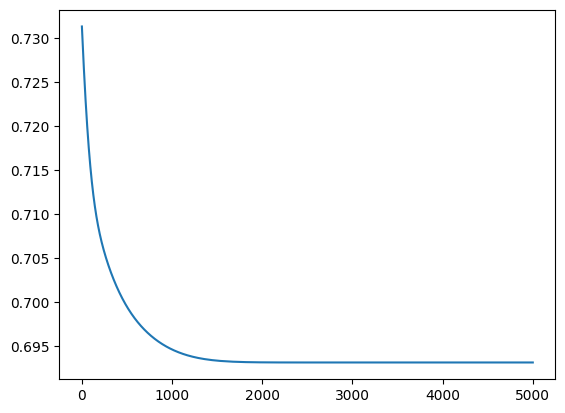

In [154]:
plt.plot(losses)

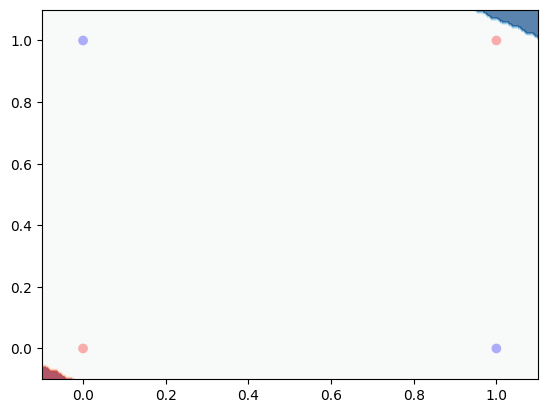

In [155]:
plot_decision_boundary(model_xor1, x, y_xor)

In [156]:
print("XOR")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_xor[i].detach().numpy()}\t{round(model_xor1(x[i]).item())}")

XOR
x	y	output
[0. 0.]	[0.]	0
[0. 1.]	[1.]	0
[1. 0.]	[1.]	0
[1. 1.]	[0.]	0


In [157]:
class model_XOR2(nn.Module):
    def __init__(self):
        super(model_XOR2, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

In [158]:
model_xor2 = model_XOR2()
optimizer_xor2 = Adam(params=model_xor2.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [159]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model_xor2(x)
    loss = loss_func(outputs, y_xor)
    loss.backward()
    losses.append(loss.item())
    optimizer_xor2.step()
    optimizer_xor2.zero_grad()

100%|██████████| 5000/5000 [00:02<00:00, 2196.35it/s]


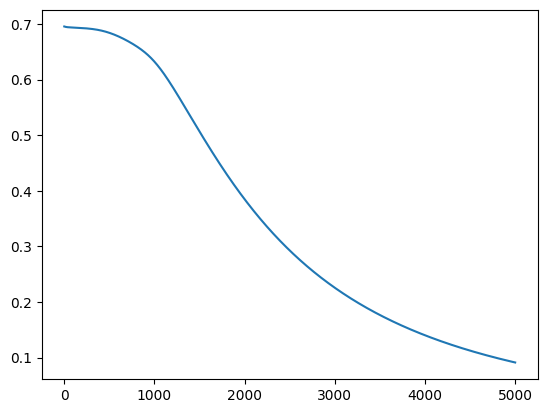

In [160]:
plt.plot(losses)

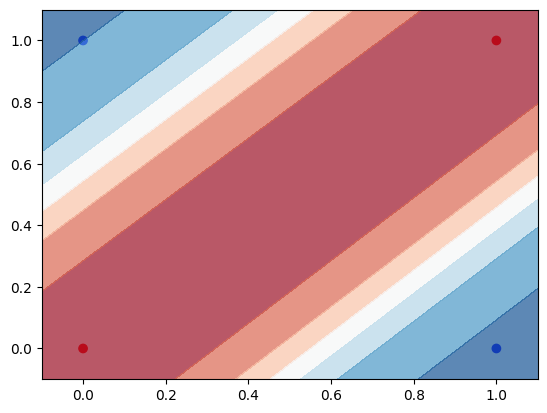

In [161]:
plot_decision_boundary(model_xor2, x, y_xor)

In [162]:
print("XOR")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_xor[i].detach().numpy()}\t{round(model_xor2(x[i]).item())}")

XOR
x	y	output
[0. 0.]	[0.]	0
[0. 1.]	[1.]	1
[1. 0.]	[1.]	1
[1. 1.]	[0.]	0


In [163]:
def sigmoid(input):
  return 1 / (1 + np.exp(-input))

def tanh(input):
  return (np.exp(2*input) - 1) / (np.exp(2*input) + 1)

def relu(input):
  return (max(0, input))

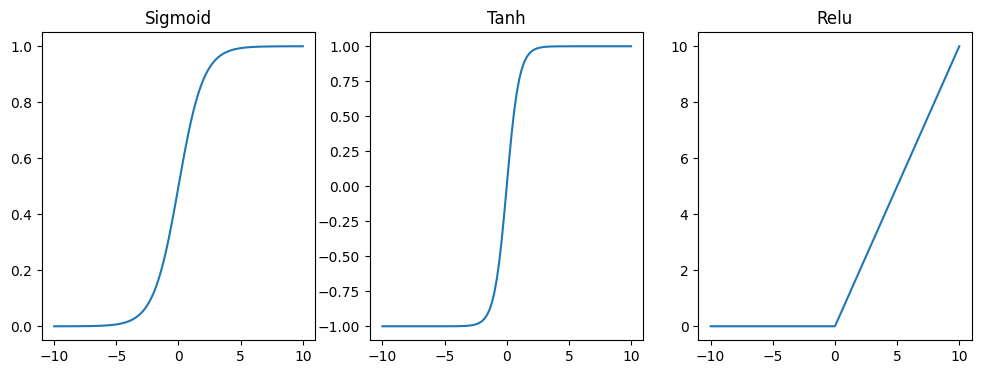

In [164]:
act_x = np.linspace(-10, 10, 101)
sigmoid_y = [sigmoid(x) for x in act_x]
tanh_y = [tanh(x) for x in act_x]
relu_y = [relu(x) for x in act_x]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(act_x, sigmoid_y)
plt.title("Sigmoid")

plt.subplot(1, 3, 2)
plt.plot(act_x, tanh_y)
plt.title("Tanh")

plt.subplot(1, 3, 3)
plt.plot(act_x, relu_y)
plt.title("Relu")
plt.show()